# Load DataSet

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector,Selector2
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0


In [3]:
df.drop("Selector",axis=1,inplace=True)

# Eksplorasi Data

In [4]:
df.shape

(583, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector2  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector2    0
dtype: int64

In [7]:
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector2
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [8]:
#imbalance
df["Selector2"].value_counts()

0    416
1    167
Name: Selector2, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["Gender"] = labelencoder.fit_transform(df["Gender"])

In [10]:
df["Gender"] = df["Gender"].astype(int)

In [11]:
df.duplicated().sum()

13

In [12]:
df.drop_duplicates(inplace=True)

# Pre Processing data

In [13]:
#ngisi missing value
df["A/G Ratio"].fillna(df["A/G Ratio"].mean(),axis=0,inplace=True)

In [14]:
q1 = np.percentile(df,25)
q3 = np.percentile(df,75)
iqr = q3-q1

lower_bound = q1- 1.5 * iqr
upper_bound = q3 + 1.5 *iqr

data_no_outliers = df[(df>= lower_bound) & (df<= upper_bound)]

<Axes: >

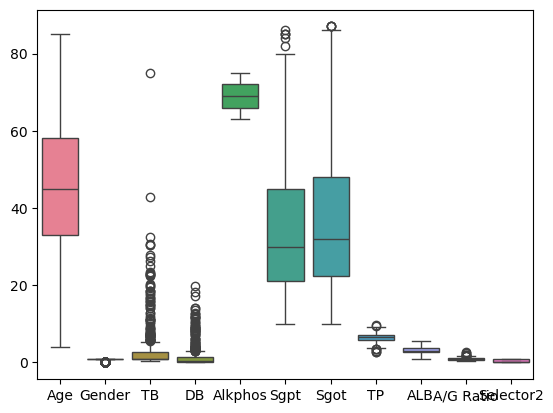

In [15]:
sns.boxplot(data_no_outliers)

In [16]:
X = df.drop("Selector2",axis=1)
y = df["Selector2"]

In [17]:
X.fillna(X.mean(),inplace=True)

In [18]:
from imblearn.over_sampling import SMOTE
scaler = SMOTE(k_neighbors=3, random_state=42)

X_resampled,y_resampled = scaler.fit_resample(X,y)

In [19]:
X_resampled

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,0,0.700000,0.100000,187,16,18,6.800000,3.300000,0.900000
1,62,1,10.900000,5.500000,699,64,100,7.500000,3.200000,0.740000
2,62,1,7.300000,4.100000,490,60,68,7.000000,3.300000,0.890000
3,58,1,1.000000,0.400000,182,14,20,6.800000,3.400000,1.000000
4,72,1,3.900000,2.000000,195,27,59,7.300000,2.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...
807,60,1,1.503881,0.607762,197,62,84,6.750452,3.807762,1.288357
808,50,1,0.700000,0.200000,193,18,15,7.494649,4.200000,1.271605
809,36,0,1.395791,0.517475,348,151,80,8.221684,4.341263,1.080421
810,52,0,1.551447,0.851447,177,42,58,6.430639,3.816766,1.458383


In [20]:
y_resampled.value_counts()

0    406
1    406
Name: Selector2, dtype: int64

In [21]:
X_resampled.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,44.155172,0.681034,2.655975,1.160839,268.876847,65.873153,87.353448,6.519576,3.217344,0.977546
std,16.075901,0.466363,5.365527,2.438927,215.872975,154.029614,246.504534,1.031285,0.751599,0.297450
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,32.000000,0.000000,0.767345,0.200000,172.000000,22.000000,23.000000,5.900000,2.700000,0.800000
50%,45.000000,1.000000,0.900000,0.295345,198.000000,31.000000,34.000000,6.600000,3.200000,1.000000
75%,57.000000,1.000000,1.800000,0.800000,282.000000,52.250000,66.250000,7.200000,3.801349,1.112343
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


<Axes: >

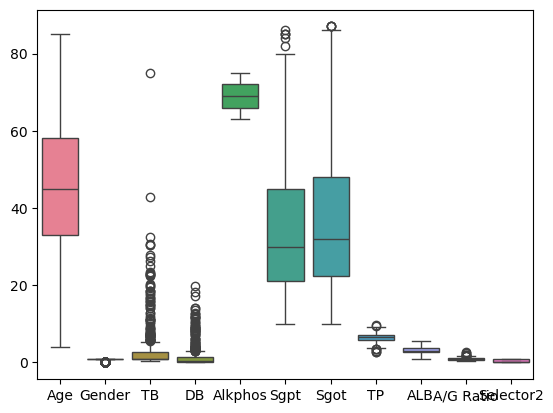

In [22]:
sns.boxplot(data_no_outliers)

In [23]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# X_normalisasi = scaler.fit_transform(X_resampled)

In [24]:
# X_normalisasi

# ML

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        72
           1       0.86      0.84      0.85        91

    accuracy                           0.83       163
   macro avg       0.83      0.83      0.83       163
weighted avg       0.84      0.83      0.83       163

0.8343558282208589


Text(50.722222222222214, 0.5, 'Prediction')

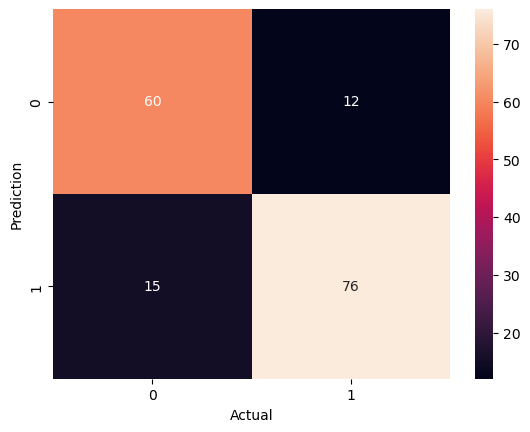

In [26]:
from sklearn.ensemble import GradientBoostingClassifier


modelgbc = GradientBoostingClassifier(random_state=42)

modelgbc.fit(X_train,y_train)
y_predgbc = modelgbc.predict(X_test)

reportgbc = classification_report(y_test,y_predgbc)
accgbc = accuracy_score(y_test,y_predgbc)
confgbc = confusion_matrix(y_test,y_predgbc)

print(reportgbc)
print(accgbc)

sns.heatmap(confgbc,annot= True)
plt.xlabel("Actual")
plt.ylabel("Prediction")

In [27]:
import pickle
with open("modelGBC.pkl","wb") as f:
    pickle.dump(modelgbc, f)

In [28]:
import joblib
joblib.dump(modelgbc, "modelGBC.joblib")

['modelGBC.joblib']

              precision    recall  f1-score   support

           0       0.72      0.57      0.64        72
           1       0.71      0.82      0.76        91

    accuracy                           0.71       163
   macro avg       0.71      0.70      0.70       163
weighted avg       0.71      0.71      0.71       163

0.7116564417177914


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'Prediction')

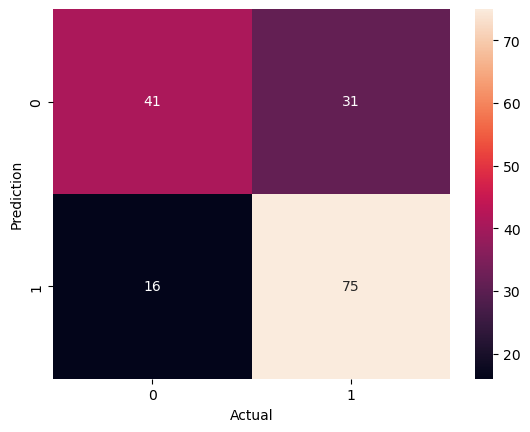

In [29]:
from sklearn.linear_model import LogisticRegression

modelLr = LogisticRegression()
modelLr.fit(X_train,y_train)
y_pred_lr = modelLr.predict(X_test)

reportLr = classification_report(y_test,y_pred_lr)
accLr = accuracy_score(y_test,y_pred_lr)
confLr = confusion_matrix(y_test,y_pred_lr)

print(reportLr)
print(accLr)

sns.heatmap(confLr,annot=True)
plt.xlabel("Actual")
plt.ylabel("Prediction")

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        72
           1       0.76      0.89      0.82        91

    accuracy                           0.78       163
   macro avg       0.79      0.76      0.77       163
weighted avg       0.79      0.78      0.77       163

0.7791411042944786


Text(50.722222222222214, 0.5, 'Prediction')

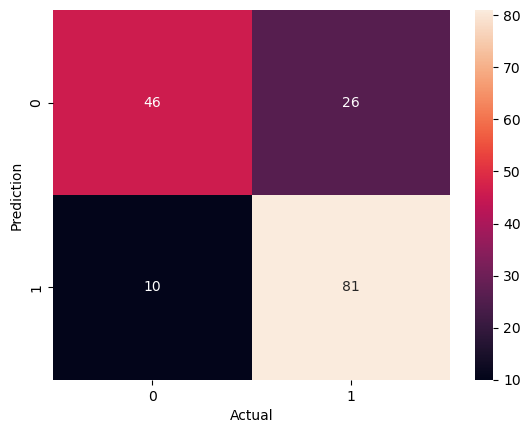

In [30]:
from sklearn.neighbors import KNeighborsClassifier

modelKnn = KNeighborsClassifier(n_neighbors=3)
modelKnn.fit(X_train,y_train)
y_pred_knn = modelKnn.predict(X_test)
report_knn = classification_report(y_test,y_pred_knn)
accknn = accuracy_score(y_test,y_pred_knn)
confknn = confusion_matrix(y_test,y_pred_knn)

print(report_knn)
print(accknn)
sns.heatmap(confknn,annot=True)
plt.xlabel("Actual")
plt.ylabel("Prediction")

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        72
           1       0.75      0.88      0.81        91

    accuracy                           0.77       163
   macro avg       0.78      0.75      0.76       163
weighted avg       0.77      0.77      0.76       163

0.7668711656441718


Text(50.722222222222214, 0.5, 'Prediction')

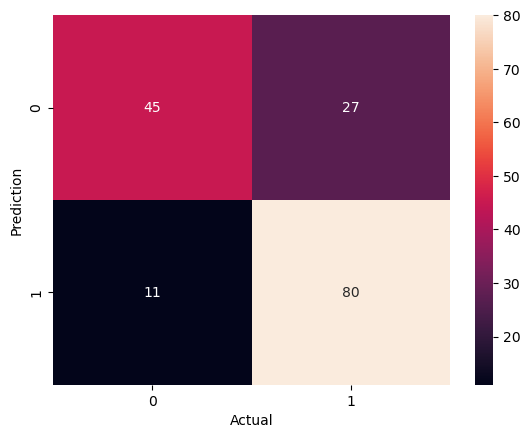

In [31]:
from xgboost import XGBRFClassifier
modelXGBRF = XGBRFClassifier()

modelXGBRF.fit(X_train,y_train)
y_pred_xgbrf = modelXGBRF.predict(X_test)
reportXGBRF = classification_report(y_test,y_pred_xgbrf)
accXGBRF = accuracy_score(y_test,y_pred_xgbrf)
confXGBRF = confusion_matrix(y_test,y_pred_xgbrf)

print(reportXGBRF)
print(accXGBRF)
sns.heatmap(confXGBRF,annot=True)
plt.xlabel("Actual")
plt.ylabel("Prediction")

Kombinasi hiperparameter terbaik: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.74      0.58      0.65        72
           1       0.72      0.84      0.77        91

    accuracy                           0.72       163
   macro avg       0.73      0.71      0.71       163
weighted avg       0.73      0.72      0.72       163

0.7239263803680982


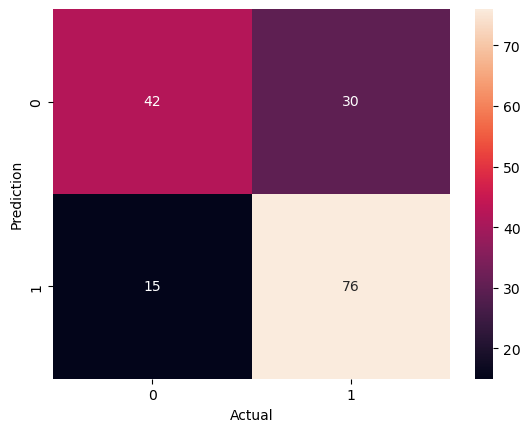

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Definisikan model logistic regression
modelLr = LogisticRegression()

# Tentukan kisi (grid) dari nilai-nilai hiperparameter yang akan diuji
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Jenis regularisasi
    'solver': ['liblinear'],  # Solver yang digunakan
}

# Lakukan penyetelan hiperparameter dengan menggunakan GridSearchCV
grid_search = GridSearchCV(modelLr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Tampilkan kombinasi terbaik dari hiperparameter
print("Kombinasi hiperparameter terbaik:", grid_search.best_params_)

# Evaluasi model pada set uji
best_model = grid_search.best_estimator_
y_pred_lr = best_model.predict(X_test)

reportLr = classification_report(y_test, y_pred_lr)
accLr = accuracy_score(y_test, y_pred_lr)
confLr = confusion_matrix(y_test, y_pred_lr)

print(reportLr)
print(accLr)

# Visualisasi confusion matrix
sns.heatmap(confLr, annot=True)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()


Kombinasi hiperparameter terbaik: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        72
           1       0.85      0.82      0.84        91

    accuracy                           0.82       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.82      0.82      0.82       163

0.8220858895705522


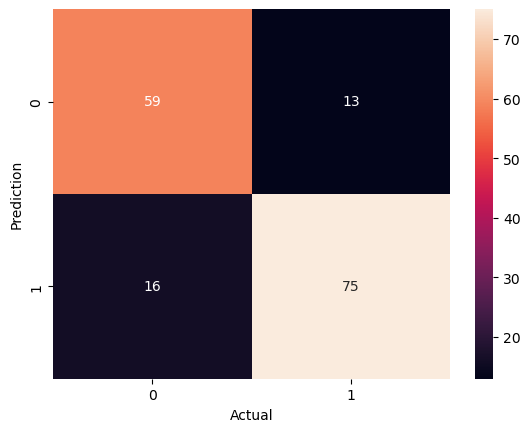

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Definisikan model Gradient Boosting Classifier
modelgbc = GradientBoostingClassifier(random_state=42)

# Tentukan kisi (grid) dari nilai-nilai hiperparameter yang akan diuji
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # Tingkat pembelajaran
    'n_estimators': [100, 200, 300],  # Jumlah pohon
    'max_depth': [3, 4, 5],  # Kedalaman maksimum pohon
}

# Lakukan penyetelan hiperparameter dengan menggunakan GridSearchCV
grid_search = GridSearchCV(modelgbc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Tampilkan kombinasi terbaik dari hiperparameter
print("Kombinasi hiperparameter terbaik:", grid_search.best_params_)

# Evaluasi model pada set uji
best_model = grid_search.best_estimator_
y_predgbc = best_model.predict(X_test)

reportgbc = classification_report(y_test, y_predgbc)
accgbc = accuracy_score(y_test, y_predgbc)
confgbc = confusion_matrix(y_test, y_predgbc)

print(reportgbc)
print(accgbc)

# Visualisasi confusion matrix
sns.heatmap(confgbc, annot=True)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()
